In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps
import matplotlib.cm as cm
import matplotlib.colors as colors
import gmaps.datasets

# Google developer API key
from config import gkey

#this is a function online for zipcode generation 
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)
from uszipcode import Zipcode

# Configure gmaps
gmaps.configure(api_key=gkey)

source = "Rolling Sales NYC/df_sales_pc_change.csv"
df = pd.read_csv(source)



df['ZIP CODE'] = df['ZIP CODE'].astype(int)
# df['Sales_Price_Change_Sep_Nov'] = [1-((x)/100) for x in df['Sales_Price_Change_Sep_Nov']]
df

,Unnamed: 0,ZIP CODE,SALE PRICE Sept 2018,SALE PRICE Oct 2018,SALE PRICE Nov 2018,SALE PRICE Dec 2018,SALE PRICE Jan 2019,SALE PRICE Feb 2019,SALE PRICE,Sales_Price_Change_Sep_Nov,Sales_Price_Change_Nov_Jan
0,36,11249,999062.0,1270000.0,961677.0,984500.0,1590551.0,1462747.0,1517500.0,-3.742010,65.393474
1,9,11211,1200000.0,774429.5,778526.0,995000.0,1250000.0,1359500.0,960000.0,-35.122833,60.559827
2,34,11237,842500.0,850000.0,1225000.0,801250.0,1750000.0,1637500.0,1550000.0,45.400593,42.857143
3,20,11222,2100000.0,1353750.0,1117500.0,1049950.0,1575000.0,1337500.0,1398843.5,-46.785714,40.939597
4,30,11233,917225.0,966000.0,772000.0,900000.0,845000.0,625000.0,735000.0,-15.833083,9.455959
5,4,11206,1235000.0,681799.5,729474.0,749228.0,749228.0,698112.0,1350000.0,-40.933279,2.707979
6,33,11236,500000.0,550000.0,535000.0,590000.0,500000.0,585000.0,550000.0,7.000000,-6.542056
7,5,11207,650000.0,515000.0,580000.0,499999.0,488125.0,590585.0,480000.0,-10.769231,-15.840517
8,10,11212,515000.0,450000.0,696500.0,613740.0,537500.0,717500.0,610250.0,35.242718,-22.828428


In [150]:
# lat_list = []
# for zipcode in list(df['ZIP CODE']):
#     lats = search.by_zipcode(zipcode).lat
#     lat_list.append(lats)
# print(lats)

# search.by_zipcode(11249)



In [151]:
percent = df["Sales_Price_Change_Sep_Nov"].astype(float)

# Plot Heatmap
figure_layout = {
    'width': '1000px',
    'height': '1000px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

zip_list_green = []
zip_list_red = []
zip_list_red_lat = []
zip_list_red_lng = []
zip_list_green_lat = []
zip_list_green_lng = []
zip_green_shade = []
zip_red_shade = []

#For loop will run through percentages dataframe
for index,row in df.iterrows():
    
    #Pull in all positive percentages
    if df['Sales_Price_Change_Sep_Nov'][index] > 0:
        zip_list_green_lat = (search.by_zipcode(df['ZIP CODE'][index]).lat) #Pull latitude information
        zip_list_green_lng = (search.by_zipcode(df['ZIP CODE'][index]).lng) #Pull longitude information
        zip_list_green_temp = (zip_list_green_lat,zip_list_green_lng)       #Join to make coordinates
        zip_list_green.append(zip_list_green_temp)
        #Bin results into 3 different segments 0-20%, 20-40%, 40%-<
        if df['Sales_Price_Change_Sep_Nov'][index] > 0 and df['Sales_Price_Change_Sep_Nov'][index] <= 20:
            shade = '#a4b800'
            zip_green_shade.append(shade)
        if df['Sales_Price_Change_Sep_Nov'][index] > 20 and df['Sales_Price_Change_Sep_Nov'][index] <= 40:
            shade = '#459c00'
            zip_green_shade.append(shade)
        if df['Sales_Price_Change_Sep_Nov'][index] > 40:
            shade = 'green'
            zip_green_shade.append(shade)
    if df['Sales_Price_Change_Sep_Nov'][index] < 0:
        zip_list_red_lat = (search.by_zipcode(df['ZIP CODE'][index]).lat)
        zip_list_red_lng = (search.by_zipcode(df['ZIP CODE'][index]).lng)        
        zip_list_red_temp = (zip_list_red_lat,zip_list_red_lng)
        zip_list_red.append(zip_list_red_temp)
        if df['Sales_Price_Change_Sep_Nov'][index] < 0 and df['Sales_Price_Change_Sep_Nov'][index] >= -20:
            shade = '#c7b000'
            zip_red_shade.append(shade)
        if df['Sales_Price_Change_Sep_Nov'][index] < -20 and df['Sales_Price_Change_Sep_Nov'][index] >= -40:
            shade = '#d58e00'
            zip_red_shade.append(shade)
        if df['Sales_Price_Change_Sep_Nov'][index] < -40:
            shade = 'red'
            zip_red_shade.append(shade)
            
#11249 has no uszip data
location_11249 = (40.72, -73.96) #pull information from google maps manually
zip_list_red[0] = location_11249
         
# Create heat layer
green_layer = gmaps.symbol_layer(zip_list_green,
                                fill_color=zip_green_shade,
                                stroke_color=zip_green_shade,
                                scale = 15,
                                fill_opacity = 0.75,
                                stroke_opacity = 0.75)
red_layer = gmaps.symbol_layer(zip_list_red,
                                fill_color=zip_red_shade,
                                stroke_color=zip_red_shade,
                                scale = 15,
                                fill_opacity = 0.75,
                                stroke_opacity = 0.75,)
fig.add_layer(gmaps.transit_layer())
# Add layer
fig.add_layer(green_layer)
fig.add_layer(red_layer)
# Display figure
fig


Figure(layout=FigureLayout(border='1px solid black', height='1000px', margin='0 auto 0 auto', padding='1px', w…

In [105]:
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("green"),10))

In [115]:
colors

[<Color red>,
 <Color #f13600>,
 <Color #e36500>,
 <Color #d58e00>,
 <Color #c7b000>,
 <Color #a4b800>,
 <Color #72aa00>,
 <Color #459c00>,
 <Color #208e00>,
 <Color green>]

In [147]:
percent = df["Sales_Price_Change_Nov_Jan"].astype(float)

# Plot Heatmap
figure_layout = {
    'width': '1000px',
    'height': '1000px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

zip_list_green = []
zip_list_red = []
zip_list_red_lat = []
zip_list_red_lng = []
zip_list_green_lat = []
zip_list_green_lng = []
zip_green_shade = []
zip_red_shade = []

for index,row in df.iterrows():
    if df['Sales_Price_Change_Nov_Jan'][index] > 0:
        zip_list_green_lat = (search.by_zipcode(df['ZIP CODE'][index]).lat)
        zip_list_green_lng = (search.by_zipcode(df['ZIP CODE'][index]).lng)
        zip_list_green_temp = (zip_list_green_lat,zip_list_green_lng)
        zip_list_green.append(zip_list_green_temp)
        if df['Sales_Price_Change_Nov_Jan'][index] > 0 and df['Sales_Price_Change_Nov_Jan'][index] <= 20:
            shade = '#a4b800'
            zip_green_shade.append(shade)
        if df['Sales_Price_Change_Nov_Jan'][index] > 20 and df['Sales_Price_Change_Nov_Jan'][index] <= 40:
            shade = '#459c00'
            zip_green_shade.append(shade)
        if df['Sales_Price_Change_Nov_Jan'][index] > 40:
            shade = 'green'
            zip_green_shade.append(shade)
    if df['Sales_Price_Change_Nov_Jan'][index] < 0:
        zip_list_red_lat = (search.by_zipcode(df['ZIP CODE'][index]).lat)
        zip_list_red_lng = (search.by_zipcode(df['ZIP CODE'][index]).lng)        
        zip_list_red_temp = (zip_list_red_lat,zip_list_red_lng)
        zip_list_red.append(zip_list_red_temp)
        if df['Sales_Price_Change_Nov_Jan'][index] < 0 and df['Sales_Price_Change_Nov_Jan'][index] >= -20:
            shade = '#c7b000'
            zip_red_shade.append(shade)
        if df['Sales_Price_Change_Nov_Jan'][index] < -20 and df['Sales_Price_Change_Nov_Jan'][index] >= -40:
            shade = '#d58e00'
            zip_red_shade.append(shade)
        if df['Sales_Price_Change_Nov_Jan'][index] < -40:
            shade = 'red'
            zip_red_shade.append(shade)
#11249 has no uszip data
location_11249 = (40.72, -73.96) #pull information from google maps manually
zip_list_green[0] = location_11249
         
# Create heat layer
green_layer = gmaps.symbol_layer(zip_list_green,
                                fill_color=zip_green_shade,
                                stroke_color=zip_green_shade,
                                scale = 15,
                                fill_opacity = 0.75,
                                stroke_opacity = 0.75)
red_layer = gmaps.symbol_layer(zip_list_red,
                                fill_color=zip_red_shade,
                                stroke_color=zip_red_shade,
                                scale = 15,
                                fill_opacity = 0.75,
                                stroke_opacity = 0.75,)
fig.add_layer(gmaps.transit_layer())
# Add layer
fig.add_layer(green_layer)
fig.add_layer(red_layer)
# Display figure
fig



Figure(layout=FigureLayout(border='1px solid black', height='1000px', margin='0 auto 0 auto', padding='1px', w…

In [146]:
zip_list_green

[(None, None),
 (40.71, -73.95),
 (40.7, -73.92),
 (40.73, -73.95),
 (40.68, -73.92),
 (40.7, -73.94)]

In [152]:
percent = df["Sales_Price_Change_Sep_Nov"].astype(float)

# Plot Heatmap
figure_layout = {
    'width': '1000px',
    'height': '1000px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

zip_list_green = []
zip_list_red = []
zip_list_red_lat = []
zip_list_red_lng = []
zip_list_green_lat = []
zip_list_green_lng = []
zip_green_shade = []
zip_red_shade = []

for index,row in df.iterrows():
    if df['Sales_Price_Change_Sep_Nov'][index] > 0:
        zip_list_green_lat = (search.by_zipcode(df['ZIP CODE'][index]).lat)
        zip_list_green_lng = (search.by_zipcode(df['ZIP CODE'][index]).lng)
        zip_list_green_temp = (zip_list_green_lat,zip_list_green_lng)
        zip_list_green.append(zip_list_green_temp)
        if df['Sales_Price_Change_Sep_Nov'][index] > 0 and df['Sales_Price_Change_Sep_Nov'][index] <= 20:
            shade = '#a4b800'
            zip_green_shade.append(shade)
        if df['Sales_Price_Change_Sep_Nov'][index] > 20 and df['Sales_Price_Change_Sep_Nov'][index] <= 40:
            shade = '#459c00'
            zip_green_shade.append(shade)
        if df['Sales_Price_Change_Sep_Nov'][index] > 40:
            shade = 'green'
            zip_green_shade.append(shade)
    if df['Sales_Price_Change_Sep_Nov'][index] < 0:
        zip_list_red_lat = (search.by_zipcode(df['ZIP CODE'][index]).lat)
        zip_list_red_lng = (search.by_zipcode(df['ZIP CODE'][index]).lng)        
        zip_list_red_temp = (zip_list_red_lat,zip_list_red_lng)
        zip_list_red.append(zip_list_red_temp)
        if df['Sales_Price_Change_Sep_Nov'][index] < 0 and df['Sales_Price_Change_Sep_Nov'][index] >= -20:
            shade = '#c7b000'
            zip_red_shade.append(shade)
        if df['Sales_Price_Change_Sep_Nov'][index] < -20 and df['Sales_Price_Change_Sep_Nov'][index] >= -40:
            shade = '#d58e00'
            zip_red_shade.append(shade)
        if df['Sales_Price_Change_Sep_Nov'][index] < -40:
            shade = 'red'
            zip_red_shade.append(shade)
#11249 has no uszip data
location_11249 = (40.72, -73.96) #pull information from google maps manually
zip_list_red[0] = location_11249
         
# Create heat layer
green_layer = gmaps.symbol_layer(zip_list_green,
                                fill_color=zip_green_shade,
                                stroke_color=zip_green_shade,
                                scale = 15,
                                fill_opacity = 0.75,
                                stroke_opacity = 0.75)
red_layer = gmaps.symbol_layer(zip_list_red,
                                fill_color=zip_red_shade,
                                stroke_color=zip_red_shade,
                                scale = 15,
                                fill_opacity = 0.75,
                                stroke_opacity = 0.75,)
fig.add_layer(gmaps.transit_layer())
# Add layer
fig.add_layer(green_layer)
fig.add_layer(red_layer)
# Display figure
fig


Figure(layout=FigureLayout(border='1px solid black', height='1000px', margin='0 auto 0 auto', padding='1px', w…

In [154]:
search.by_zipcode(11221)

SimpleZipcode(zipcode='11221', zipcode_type='Standard', major_city='Brooklyn', post_office_city='Brooklyn, NY', common_city_list=['Brooklyn'], county='Kings County', state='NY', lat=40.69, lng=-73.93, timezone='Eastern', radius_in_miles=1.0, area_code_list=['718'], population=78895, population_density=57033.0, land_area_in_sqmi=1.38, water_area_in_sqmi=0.0, housing_units=31784, occupied_housing_units=28391, median_home_value=543800, median_household_income=39178, bounds_west=-73.948185, bounds_east=-73.908853, bounds_north=40.701762, bounds_south=40.683567)

In [155]:
green_layer = gmaps.symbol_layer(40.53,-73.80,
                                fill_color=zip_green_shade,
                                stroke_color=zip_green_shade,
                                scale = 15,
                                fill_opacity = 0.75,
                                stroke_opacity = 0.75)

TypeError: object of type 'float' has no len()

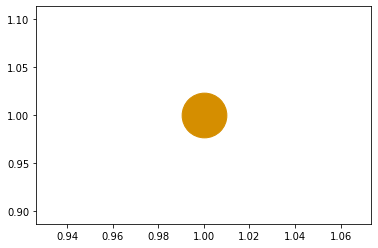

In [170]:
plt.scatter(1,1,color = '#d58e00',s = 2000)